In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/atharv/OneDrive/Desktop/ML/manalidata.csv")

In [3]:
df["time"] = pd.to_datetime(df["system:time_start"])

In [4]:
df.info()

In [5]:
dfnew = df.iloc[:,1:3]

In [6]:
dfnew

In [7]:
dfnew.set_index(dfnew.time, inplace=True)

In [8]:
dfnew1 = dfnew.iloc[:,0:1]

In [9]:
dfnew1

,Snow_Cover_Percentage
time,
2010-01-01,0.530
2010-01-02,0.456
2010-01-03,0.493
2010-01-04,0.575
2010-01-05,0.598
...,...
2020-12-26,0.619
2020-12-27,0.551
2020-12-28,NaN


In [10]:
import matplotlib.pyplot as plt

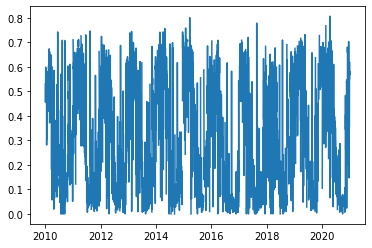

In [11]:
plt.plot(dfnew1)

In [12]:
import datetime as dt
import holidays       
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

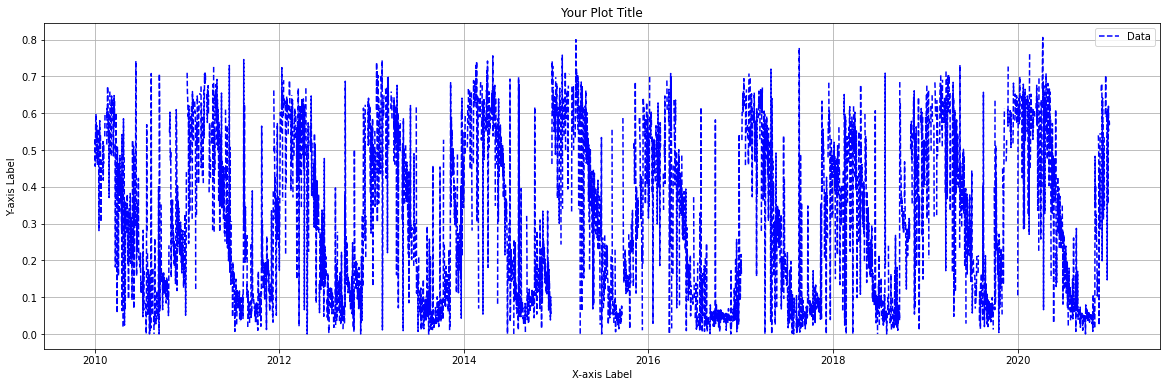

In [13]:
import matplotlib.pyplot as plt

# Assuming dfnew1 is your DataFrame or Series

# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
plt.plot(dfnew1, color='blue', linestyle='--', marker='', markersize=5, label='Data')

# Add labels to the axes
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Add a title
plt.title("Your Plot Title")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [14]:
dfclean = dfnew1.interpolate()

In [15]:
dfclean

,Snow_Cover_Percentage
time,
2010-01-01,0.5300
2010-01-02,0.4560
2010-01-03,0.4930
2010-01-04,0.5750
2010-01-05,0.5980
...,...
2020-12-26,0.6190
2020-12-27,0.5510
2020-12-28,0.5655


In [16]:
dfresample = dfclean['Snow_Cover_Percentage'].resample('M').median()

In [17]:
dfresampled = pd.DataFrame(dfresample)

In [18]:
dfresampled

,Snow_Cover_Percentage
time,
2010-01-31,0.5050
2010-02-28,0.5470
2010-03-31,0.5530
2010-04-30,0.3710
2010-05-31,0.2740
...,...
2020-08-31,0.0800
2020-09-30,0.0475
2020-10-31,0.0490


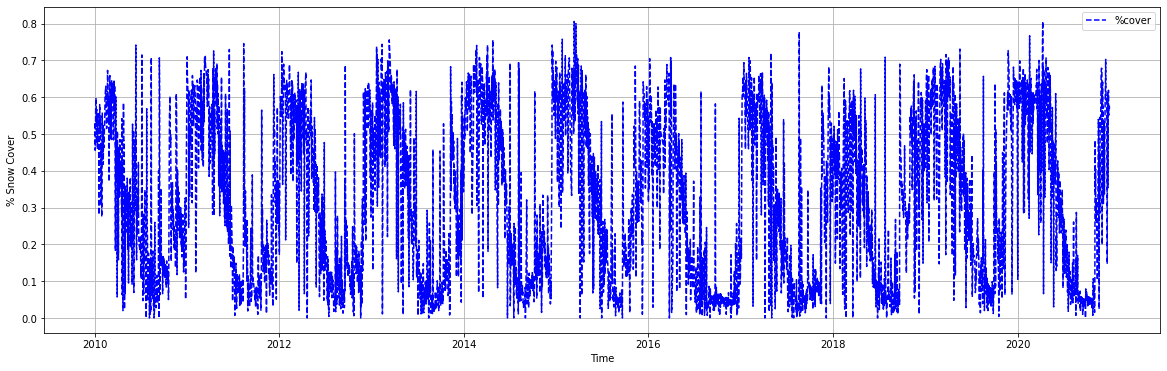

In [19]:

# Assuming dfnew1 is your DataFrame or Series

# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='%cover')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("% Snow Cover")

# Add a title
plt.title("")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [20]:
dfclean['rollmean'] = dfclean.Snow_Cover_Percentage.rolling(window=12).mean()

In [21]:
dfclean['rollStd'] = dfclean.Snow_Cover_Percentage.rolling(window=12).std()

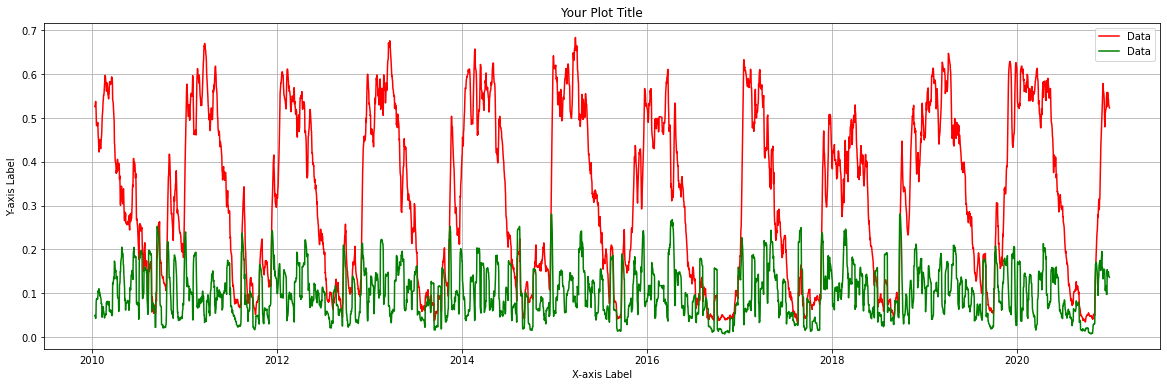

In [22]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfclean['rollmean'], color='red', marker='', markersize=5, label='Data')
plt.plot(dfclean['rollStd'], color='green', marker='', markersize=5, label='Data')

# Add labels to the axes
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Add a title
plt.title("Your Plot Title")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [23]:
def test_stationarity(df, var):
    df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
    df['rollStd'] = df[var].rolling(window=12).std()
    
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index =['Test Statistics','p-value','#lags used', 'number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():    
        print('crticality',key,":",values)
    
    plt.plot(df[var])
    plt.plot(df.rollMean)
    plt.plot(df.rollStd)

Test Statistics                  -3.987137
p-value                           0.001479
#lags used                       24.000000
number of observations used    3983.000000
dtype: float64
crticality 1% : -3.431992862018147
crticality 5% : -2.8622659265733703
crticality 10% : -2.5671564185908364


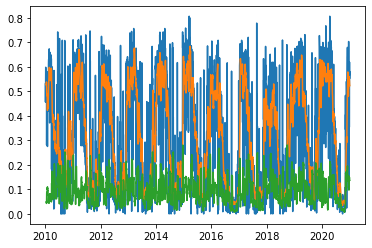

In [24]:
test_stationarity(dfclean,"Snow_Cover_Percentage")

In [25]:
dfclean['log']=np.log(dfclean.Snow_Cover_Percentage)

C:\Users\atharv\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
dfclean['shift']=dfclean.Snow_Cover_Percentage.shift(1)
dfclean['shdiff']=dfclean.Snow_Cover_Percentage-dfclean['shift']

C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


Test Statistics                  -4.002831
p-value                           0.001396
#lags used                       24.000000
number of observations used    3972.000000
dtype: float64
crticality 1% : -3.4319974146821197
crticality 5% : -2.862267937688731
crticality 10% : -2.5671574892246736


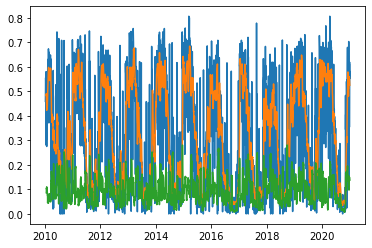

In [27]:
test_stationarity(dfclean.dropna(),"shift")

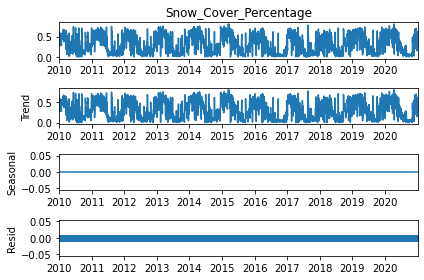

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_data = seasonal_decompose(dfclean.Snow_Cover_Percentage, model ="additive", period = 1)
decomposed_data.plot();

In [29]:
year2010 = dfclean.iloc[0:730,0:1]

In [30]:
year2010

,Snow_Cover_Percentage
time,
2010-01-01,0.530
2010-01-02,0.456
2010-01-03,0.493
2010-01-04,0.575
2010-01-05,0.598
...,...
2011-12-27,0.373
2011-12-28,0.285
2011-12-29,0.348


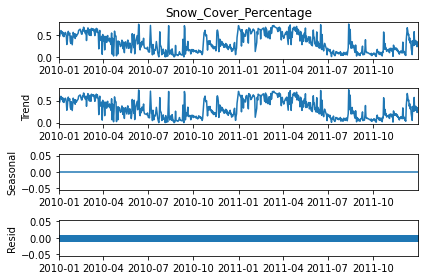

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_data = seasonal_decompose(year2010.Snow_Cover_Percentage, model ="additive", period = 1)
decomposed_data.plot();

C:\Users\atharv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


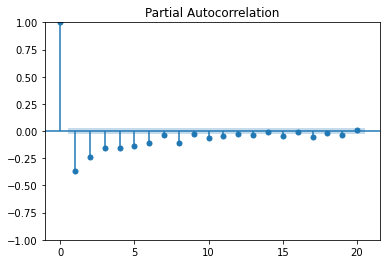

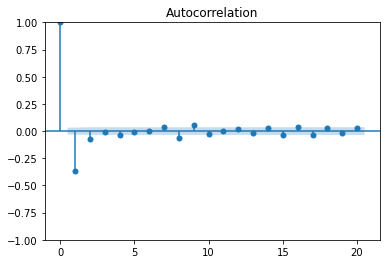

In [32]:
plot_pacf(dfclean['shdiff'].dropna(),lags=20);
plot_acf(dfclean['shdiff'].dropna(),lags=20);

In [34]:
dfclean.Snow_Cover_Percentage.dropna()
train = dfclean[:round(len(dfclean.Snow_Cover_Percentage)*70/100)]
train=train.iloc[:,0:1]
test = dfclean[round(len(dfclean.Snow_Cover_Percentage)*70/100):]
test=test.iloc[:,0:1]

In [35]:
train.tail()

,Snow_Cover_Percentage
time,
2017-09-11,0.025
2017-09-12,0.059
2017-09-13,0.014
2017-09-14,0.037
2017-09-15,0.056


In [36]:
test.head()

,Snow_Cover_Percentage
time,
2017-09-16,0.026
2017-09-17,0.074
2017-09-18,0.038
2017-09-19,0.068
2017-09-20,0.078


In [106]:
order = (1, 1, 1)

model1 = ARIMA(train['Snow_Cover_Percentage'], order=order)
model1_fit1 = model1.fit()

In [121]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
test_preds1 = pd.DataFrame({'predicted_test_values': [model1_fit1.predict(i).iloc[0] for i in range (2806, 2806+int(1202))]});
# 865+test_len yields the last index/last value of the testing data

In [122]:
test_preds1['actual_test_values'] = test.values

In [123]:
 test_preds1.index=test.index

In [124]:
dfclean["arimapred"] = test_preds1['predicted_test_values'] 

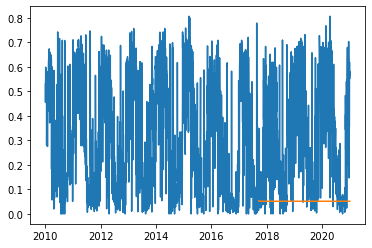

In [110]:
plt.plot(dfclean.Snow_Cover_Percentage)
plt.plot(dfclean.arimapred)

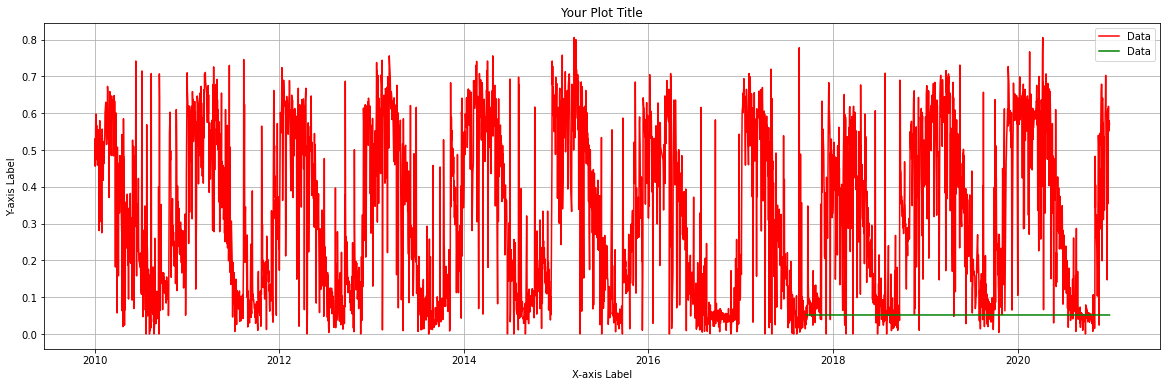

In [111]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfclean['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Data')
plt.plot(dfclean['arimapred'], color='green', marker='', markersize=5, label='Data')

# Add labels to the axes
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Add a title
plt.title("Your Plot Title")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [112]:
models = SARIMAX(train['Snow_Cover_Percentage'], order=(1,1,1),seasonal_order=(1,1,1,12))

In [113]:
modelsarima = models.fit()

C:\Users\atharv\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [114]:
test_preds = pd.DataFrame({'predicted_test_values1': [modelsarima.predict(i).iloc[0] for i in range (2806, 2806+int(1202))]});
# 865+test_len yields the last index/last value of the testing data

In [115]:
test_preds['actual_test_values1'] = test.values

In [116]:
test_preds.index = test.index

In [117]:
dfclean["srimapred"] = test_preds['predicted_test_values1']

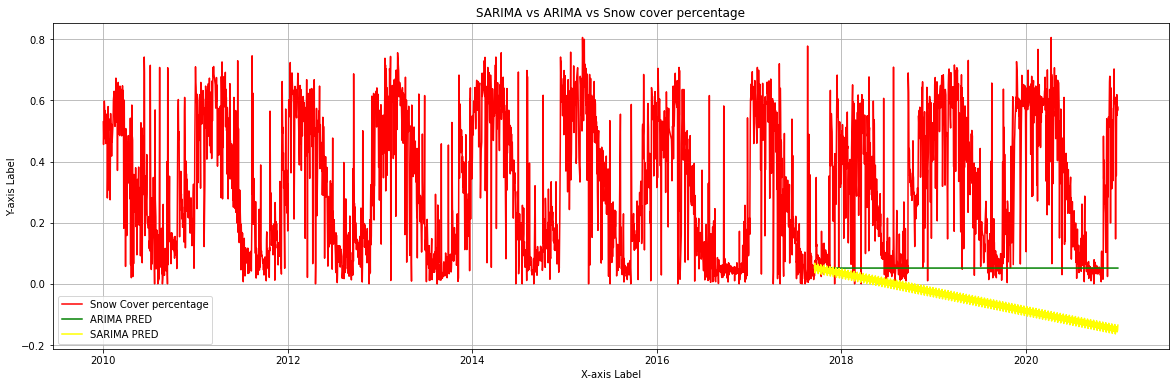

In [118]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfclean['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Snow Cover percentage')
plt.plot(dfclean['arimapred'], color='green', marker='', markersize=5, label='ARIMA PRED')
plt.plot(dfclean['srimapred'], color='yellow', marker='', markersize=5, label='SARIMA PRED')
# Add labels to the axes
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Add a title
plt.title("SARIMA vs ARIMA vs Snow cover percentage")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

In [125]:
arima_mse = mean_squared_error(test.values, test_preds1.predicted_test_values)
sarima_mse = mean_squared_error(test.values, test_preds.predicted_test_values1)


In [126]:
print(f'ARIMA MSE: {arima_mse}')
print(f'SARIMA MSE: {sarima_mse}')

ARIMA MSE: 0.12723633220280134
SARIMA MSE: 0.19899879862684977


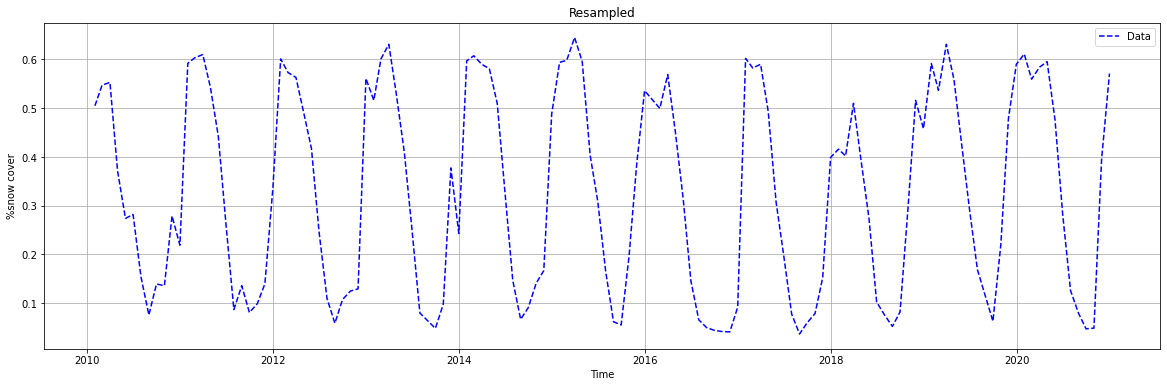

In [33]:
# Assuming dfnew1 is your DataFrame or Series

# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
plt.plot(dfresampled['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("%snow cover")

# Add a title
plt.title("Resampled")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

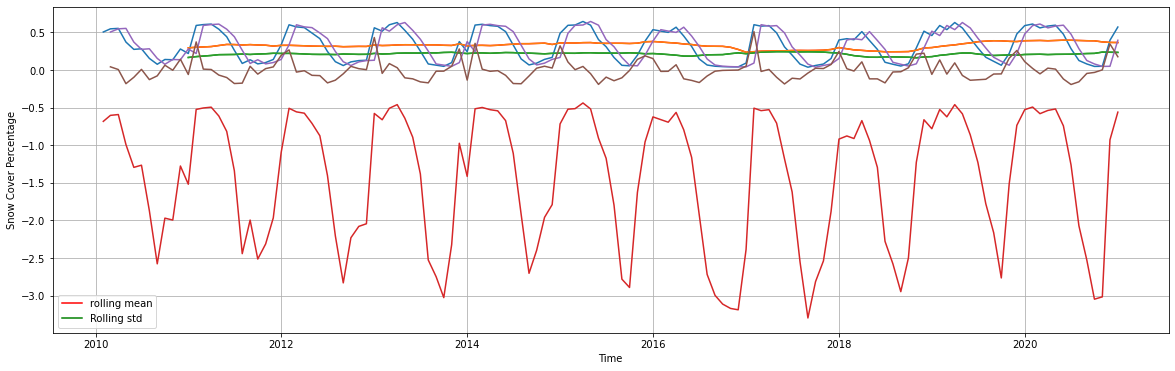

In [46]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfresampled['rollmean'], color='red', marker='', markersize=5, label='rolling mean')
plt.plot(dfresampled['rollstd'], color='green', marker='', markersize=5, label='Rolling std')
plt.plot(dfresampled)

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("Snow Cover Percentage")

# Add a title
plt.title("")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [37]:
dfresampled['rollmean'] = dfresampled.Snow_Cover_Percentage.rolling(window=12).mean()
dfresampled['rollstd'] = dfresampled.Snow_Cover_Percentage.rolling(window=12).std()

Test Statistics                 -1.263715
p-value                          0.645605
#lags used                      12.000000
number of observations used    108.000000
dtype: float64
crticality 1% : -3.4924012594942333
crticality 5% : -2.8886968193364835
crticality 10% : -2.5812552709190673


C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


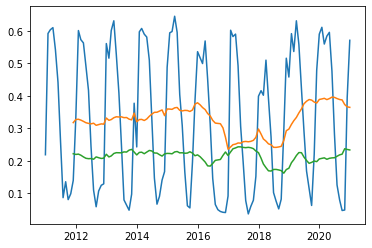

In [38]:
test_stationarity(dfresampled.dropna(),"Snow_Cover_Percentage")

In [39]:
dfresampled['log']=np.log(dfresampled.Snow_Cover_Percentage)

Test Statistics                 -1.939653
p-value                          0.313643
#lags used                      13.000000
number of observations used    107.000000
dtype: float64
crticality 1% : -3.492995948509562
crticality 5% : -2.888954648057252
crticality 10% : -2.58139291903223


C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


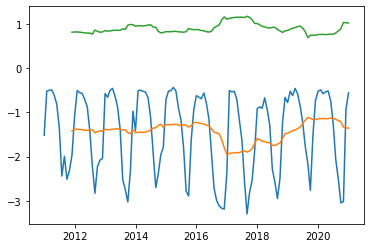

In [40]:
test_stationarity(dfresampled.dropna(),"log")

In [41]:
dfresampled['shift']=dfresampled.Snow_Cover_Percentage.shift(1)
dfresampled['shdiff']=dfresampled.Snow_Cover_Percentage-dfresampled['shift']

Test Statistics                 -1.635290
p-value                          0.464723
#lags used                      10.000000
number of observations used    110.000000
dtype: float64
crticality 1% : -3.4912451337340342
crticality 5% : -2.8881954545454547
crticality 10% : -2.5809876033057852


C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


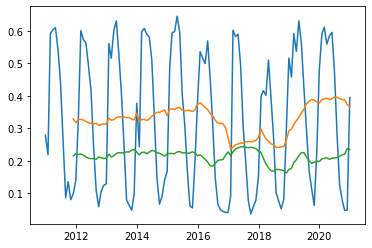

In [42]:
test_stationarity(dfresampled.dropna(),"shift")

Test Statistics               -6.862473e+00
p-value                        1.589539e-09
#lags used                     1.100000e+01
number of observations used    1.090000e+02
dtype: float64
crticality 1% : -3.49181775886872
crticality 5% : -2.8884437992971588
crticality 10% : -2.5811201893779985


C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
C:\Users\atharv\AppData\Local\Temp\ipykernel_17360\2575951211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


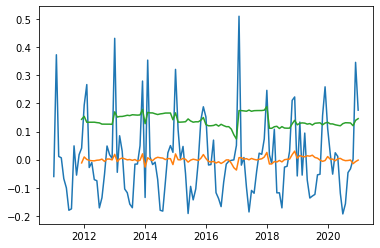

In [43]:
test_stationarity(dfresampled.dropna(),"shdiff")

C:\Users\atharv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


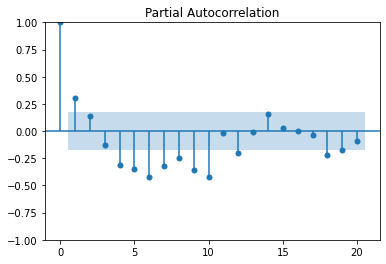

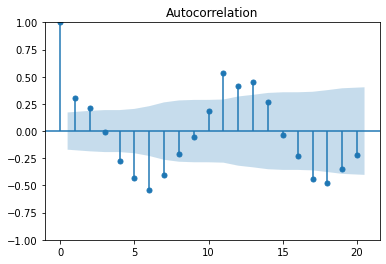

In [44]:
plot_pacf(dfresampled['shdiff'].dropna(),lags=20);
plot_acf(dfresampled['shdiff'].dropna(),lags=20);

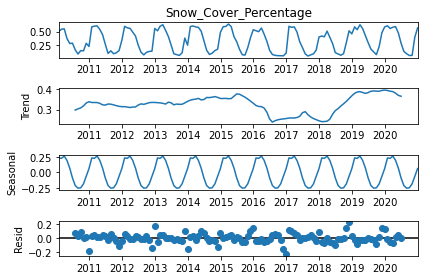

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_data = seasonal_decompose(dfresampled.Snow_Cover_Percentage, model ="additive", period = 12)
decomposed_data.plot();

In [47]:
dfresampled.Snow_Cover_Percentage.dropna()
train = dfresampled[:round(len(dfresampled.Snow_Cover_Percentage)*70/100)]
train=train.iloc[:,0:1]
test = dfresampled[round(len(dfresampled.Snow_Cover_Percentage)*70/100):]
test=test.iloc[:,0:1]

In [48]:
len(train)

92

In [49]:
len(test)

40

In [50]:
train.tail()

,Snow_Cover_Percentage
time,
2017-04-30,0.4930
2017-05-31,0.3070
2017-06-30,0.1975
2017-07-31,0.0780
2017-08-31,0.0370


In [51]:
test.head()

,Snow_Cover_Percentage
time,
2017-09-30,0.0600
2017-10-31,0.0790
2017-11-30,0.1525
2017-12-31,0.3990
2018-01-31,0.4160


In [52]:
order = (1, 1, 1)

modelr = ARIMA(train['Snow_Cover_Percentage'], order=order)
modelrfit = modelr.fit()

In [53]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
test_predsr = pd.DataFrame({'predicted_test_values': [modelrfit.predict(i).iloc[0] for i in range (92, 92+int(40))]});
# 865+test_len yields the last index/last value of the testing data

In [54]:
test_predsr['actual_test_values'] = test.values

In [55]:
 test_predsr.index=test.index

In [56]:
dfresampled["arimapred"] = test_predsr['predicted_test_values'] 

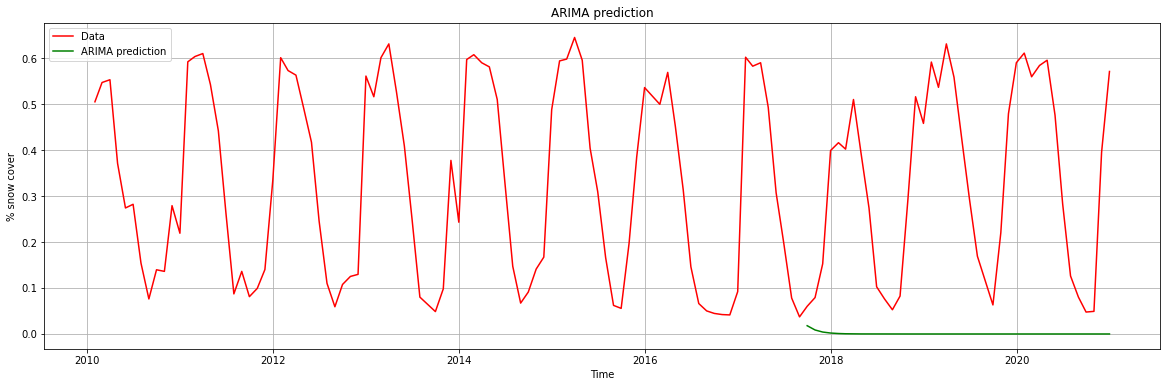

In [57]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfresampled['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Data')
plt.plot(dfresampled['arimapred'], color='green', marker='', markersize=5, label='ARIMA prediction')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("% snow cover")

# Add a title
plt.title("ARIMA prediction")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [58]:
modelrs = SARIMAX(train['Snow_Cover_Percentage'], order=(1,1,1),seasonal_order=(1,1,1,12))

In [59]:
modelrsfit = modelrs.fit()

C:\Users\atharv\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
test_predsrs = pd.DataFrame({'predicted_test_values': [modelrsfit.predict(i).iloc[0] for i in range (92, 92+int(40))]});
# 865+test_len yields the last index/last value of the testing data

In [61]:
test_predsrs['actual_test_values'] = test.values

In [62]:
 test_predsrs.index=test.index

In [63]:
dfresampled["sarimapred"] = test_predsrs['predicted_test_values'] 

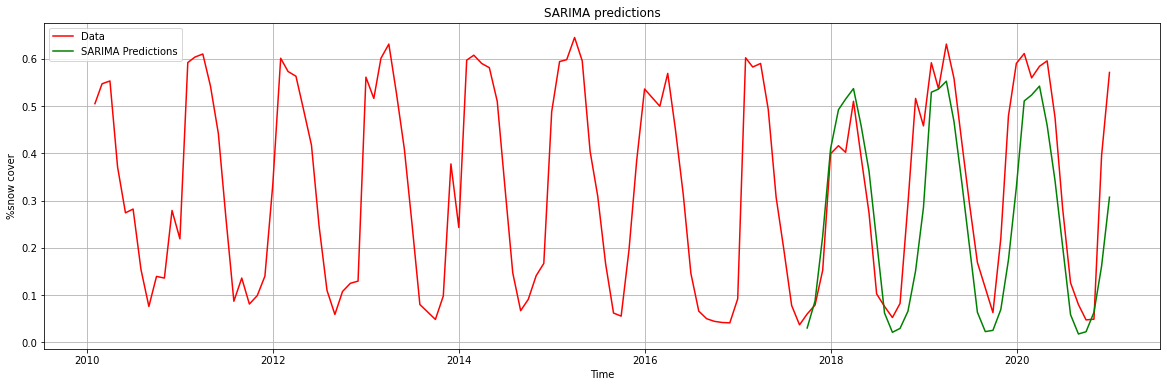

In [65]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfresampled['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Data')
plt.plot(dfresampled['sarimapred'], color='green', marker='', markersize=5, label='SARIMA Predictions')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("%snow cover")

# Add a title
plt.title("SARIMA predictions")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [66]:
arima_mse = mean_squared_error(test.values, test_predsr.predicted_test_values)
sarima_mse = mean_squared_error(test.values, test_predsrs.predicted_test_values)


In [67]:
print(f'ARIMA MSE: {arima_mse}')
print(f'SARIMA MSE: {sarima_mse}')

ARIMA MSE: 0.1520574941056795
SARIMA MSE: 0.017432157234285844


In [68]:
test.index[-1]

Timestamp('2020-12-31 00:00:00', freq='M')

In [88]:
futuredates = pd.DataFrame(pd.date_range(start  ="2021-01-01", end ="2024-11-30", freq ="MS"), columns =["DATES"])

In [89]:
futuredates.set_index(["DATES"], inplace = True)

In [98]:
len(dfresampled)

132

In [103]:
futurepred = pd.DataFrame({'predicted_future_values': [modelrsfit.predict(i).iloc[0] for i in range (132, 133 +int(48))]});
# 865+test_len yields the last index/last value of the testing data

In [104]:
#predfuture = modelrsfit.predict(start = futuredates.index[0], end= futuredates.index[-1])

In [105]:
futuredates['pred'] = futurepred

In [106]:
futuredates.head()

,pred
DATES,
2021-01-01,NaN
2021-02-01,NaN
2021-03-01,NaN
2021-04-01,NaN
2021-05-01,NaN


In [107]:
test.index

DatetimeIndex(['2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='time', freq='M')

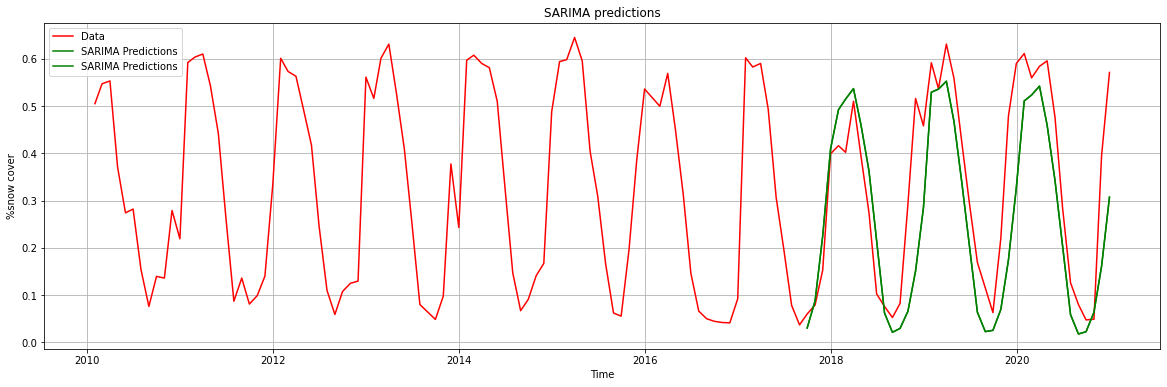

In [95]:
# Set a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(dfresampled['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Data')
plt.plot(dfresampled['sarimapred'], color='green', marker='', markersize=5, label='SARIMA Predictions')
plt.plot(dfresampled['sarimapred'], color='green', marker='', markersize=5, label='SARIMA Predictions')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("%snow cover")

# Add a title
plt.title("SARIMA predictions")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [114]:
import pandas as pd
from datetime import datetime, timedelta
import calendar

# Start date
start_date = datetime(2020, 12, 31)  # The last date in your provided list

# End date
end_date = datetime(2024, 12, 31)  # The desired end date

# Create a list of the last days of each month within the date range
date_list = []
current_date = start_date

while current_date <= end_date:
    last_day_of_month = datetime(current_date.year, current_date.month, calendar.monthrange(current_date.year, current_date.month)[1])
    date_list.append(last_day_of_month)
    current_date = last_day_of_month + timedelta(days=1)

# Convert the list of datetime objects to a list of strings in the desired format
date_list_str = [date.strftime('%Y-%m-%d') for date in date_list]

# Create a DataFrame with the date column
dffuture = pd.DataFrame({'date': date_list_str})

# Print the DataFrame
print(dffuture)


          date
0   2020-12-31
1   2021-01-31
2   2021-02-28
3   2021-03-31
4   2021-04-30
5   2021-05-31
6   2021-06-30
7   2021-07-31
8   2021-08-31
9   2021-09-30
10  2021-10-31
11  2021-11-30
12  2021-12-31
13  2022-01-31
14  2022-02-28
15  2022-03-31
16  2022-04-30
17  2022-05-31
18  2022-06-30
19  2022-07-31
20  2022-08-31
21  2022-09-30
22  2022-10-31
23  2022-11-30
24  2022-12-31
25  2023-01-31
26  2023-02-28
27  2023-03-31
28  2023-04-30
29  2023-05-31
30  2023-06-30
31  2023-07-31
32  2023-08-31
33  2023-09-30
34  2023-10-31
35  2023-11-30
36  2023-12-31
37  2024-01-31
38  2024-02-29
39  2024-03-31
40  2024-04-30
41  2024-05-31
42  2024-06-30
43  2024-07-31
44  2024-08-31
45  2024-09-30
46  2024-10-31
47  2024-11-30
48  2024-12-31


In [115]:
dffuture.set_index(dffuture.date, inplace = True)

,date
date,
2020-12-31,2020-12-31
2021-01-31,2021-01-31
2021-02-28,2021-02-28
2021-03-31,2021-03-31
2021-04-30,2021-04-30
2021-05-31,2021-05-31
2021-06-30,2021-06-30
2021-07-31,2021-07-31
2021-08-31,2021-08-31


In [117]:
predfuture = modelrsfit.predict(start = dffuture.index[0], end= dffuture.index[-1])

2020-12-31    0.307141
2021-01-31    0.513216
2021-02-28    0.523526
2021-03-31    0.541517
2021-04-30    0.457844
2021-05-31    0.335707
2021-06-30    0.198698
2021-07-31    0.056038
2021-08-31    0.015155
2021-09-30    0.019115
2021-10-31    0.061404
2021-11-30    0.161664
2021-12-31    0.310420
2022-01-31    0.507810
2022-02-28    0.518971
2022-03-31    0.537262
2022-04-30    0.453970
2022-05-31    0.333658
2022-06-30    0.195863
2022-07-31    0.052541
2022-08-31    0.011661
2022-09-30    0.015923
2022-10-31    0.057785
2022-11-30    0.156991
2022-12-31    0.304719
2023-01-31    0.505388
2023-02-28    0.516228
2023-03-31    0.534406
2023-04-30    0.450969
2023-05-31    0.329969
2023-06-30    0.192470
2023-07-31    0.049399
2023-08-31    0.008518
2023-09-30    0.012665
2023-10-31    0.054688
2023-11-30    0.154292
2023-12-31    0.302408
2024-01-31    0.501840
2024-02-29    0.512801
2024-03-31    0.531021
2024-04-30    0.447639
2024-05-31    0.326899
2024-06-30    0.189288
2024-07-31 

In [120]:
dffuture['pred'] = predfuture

In [123]:
dffuture1 = dffuture.iloc[:,1:2]

In [126]:
test.tail()

,Snow_Cover_Percentage
time,
2020-08-31,0.0800
2020-09-30,0.0475
2020-10-31,0.0490
2020-11-30,0.3950
2020-12-31,0.5710


In [124]:
dffuture1

,pred
date,
2020-12-31,0.307141
2021-01-31,0.513216
2021-02-28,0.523526
2021-03-31,0.541517
2021-04-30,0.457844
2021-05-31,0.335707
2021-06-30,0.198698
2021-07-31,0.056038
2021-08-31,0.015155


In [129]:
combined_df = pd.concat([dfresampled, dffuture1], axis=0, ignore_index=True)

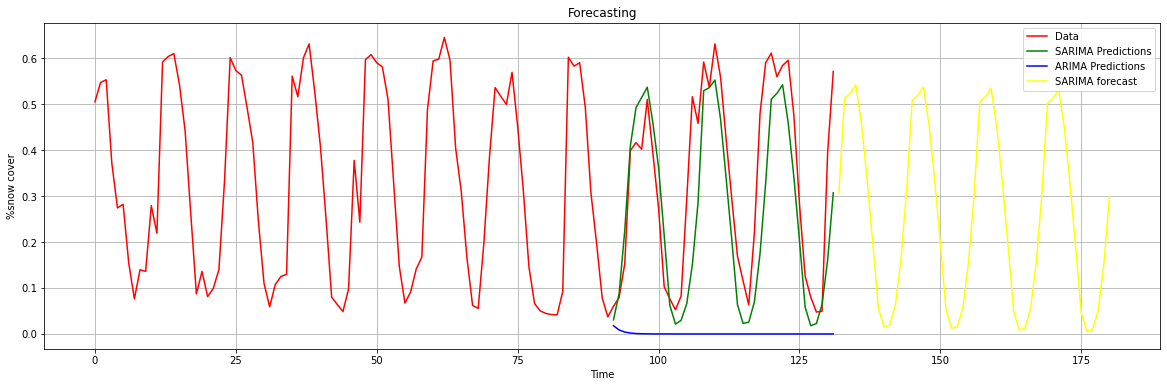

In [131]:
# aSet a larger figure size
plt.figure(figsize=(20, 6))

# Plot the data with a specific line style (e.g., blue solid line)
#plt.plot(dfclean['Snow_Cover_Percentage'], color='blue', linestyle='--', marker='', markersize=5, label='Data')
plt.plot(combined_df['Snow_Cover_Percentage'], color='red', marker='', markersize=5, label='Data')
plt.plot(combined_df['sarimapred'], color='green', marker='', markersize=5, label='SARIMA Predictions')
plt.plot(combined_df['arimapred'], color='blue', marker='', markersize=5, label='ARIMA Predictions')
plt.plot(combined_df['pred'], color='yellow', marker='', markersize=5, label='SARIMA forecast')

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("%snow cover")

# Add a title
plt.title("Forecasting")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()